In [1]:
import pandas as pd
from tqdm import tqdm

# pre_experiment = pd.read_csv('d?ata/experiments/experiments_mode.csv')
pre_experiment = None

columns = ['model_name', 'desire', 'num_sample', 'loss',
           'age_group_error', 'income_group_error', 'household_size_error', 'vehicles_error', 'family_structure_error', 'mean_error',
           'age_group_kl', 'income_group_kl', 'household_size_kl',
           'vehicles_kl', 'family_structure_kl', 'mean_kl',
           'best_params']

In [2]:
desire = 'Eat'
choice_type = 'mode'
seed = 42

In [3]:
def run_baseline_mode(model_name, model_class):
    df = pd.DataFrame(columns=columns)
    for num_sample in tqdm(range(1, 11)):
        num_sample = num_sample * 100
        model = model_class(data_dir='baseline/data',
                            desire=desire, sample_num=num_sample, seed=seed)
        if pre_experiment is not None:
            best_params = pre_experiment[(pre_experiment.model_name == model_name) & (
                pre_experiment.desire == desire) & (pre_experiment.num_sample == num_sample)].best_params.values[0]
            best_params = eval(best_params)
        else:
            best_params = None
        loss, error, kl_divergence = model.run_experiment(best_params)
        results = {
            "model_name": model_name,
            "desire": desire,
            "num_sample": num_sample,
            "loss": loss,
        }
        for key in ['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']:
            results[key + '_error'] = error[key]
            results[key + '_kl'] = kl_divergence[key]
        results['best_params'] = model.best_params
        df.loc[len(df)] = results
    return df

In [4]:
def run_proposed_model(model_name, model_class):
    df = pd.DataFrame(columns=columns)
    for num_sample in range(1, 11):
        num_sample = num_sample * 100
        choice_model = model_class(
            data_dir='data', desire=desire, sample_num=num_sample, skip_init=True, seed=seed)
        loss, error, kl_divergence = choice_model.evaluate(
            figsize=(20, 3), plot=False)
        results = {
            "model_name": model_name,
            "desire": desire,
            "num_sample": num_sample,
            "loss": loss,
        }
        for key in ['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']:
            results[key + '_error'] = error[key]
            results[key + '_kl'] = kl_divergence[key]
        df.loc[len(df)] = results
    return df

# RandomForest


In [5]:
from baseline.models.random_forest import RandomForest

model_name = 'randomforest'

rf_df = run_baseline_mode(model_name, RandomForest)
rf_df.head()

100%|██████████| 10/10 [00:44<00:00,  4.41s/it]


,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,randomforest,Eat,100,1.045195,0.155218,0.091524,0.134185,0.129926,0.117027,0.125576,0.411007,0.074680,0.149542,0.528130,0.114470,0.255566,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
1,randomforest,Eat,200,1.046204,0.152942,0.124515,0.135328,0.123060,0.105890,0.128347,1.867634,0.121690,0.117626,0.600210,0.094932,0.560418,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
2,randomforest,Eat,300,1.066860,0.143328,0.108180,0.149391,0.100574,0.138553,0.128005,0.198944,0.107758,0.199717,0.144866,0.127908,0.155839,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
3,randomforest,Eat,400,1.041820,0.100428,0.077046,0.125325,0.104962,0.121810,0.105914,0.147653,0.055959,0.180779,1.376425,0.084461,0.369056,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
4,randomforest,Eat,500,1.034573,0.096073,0.097525,0.127792,0.131081,0.098380,0.110170,0.922352,0.071909,0.218553,2.205020,0.064280,0.696423,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


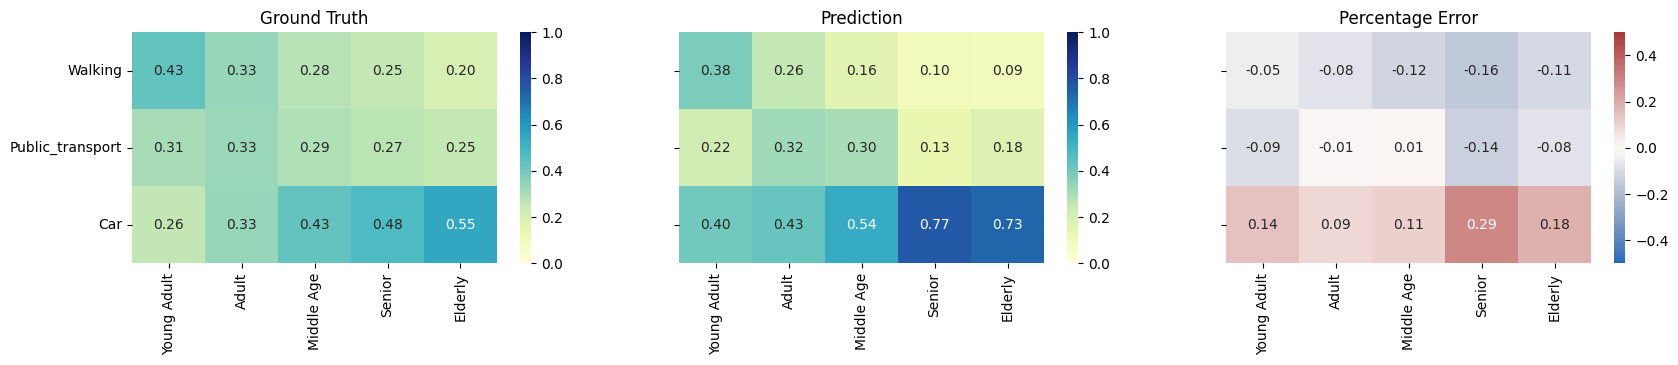

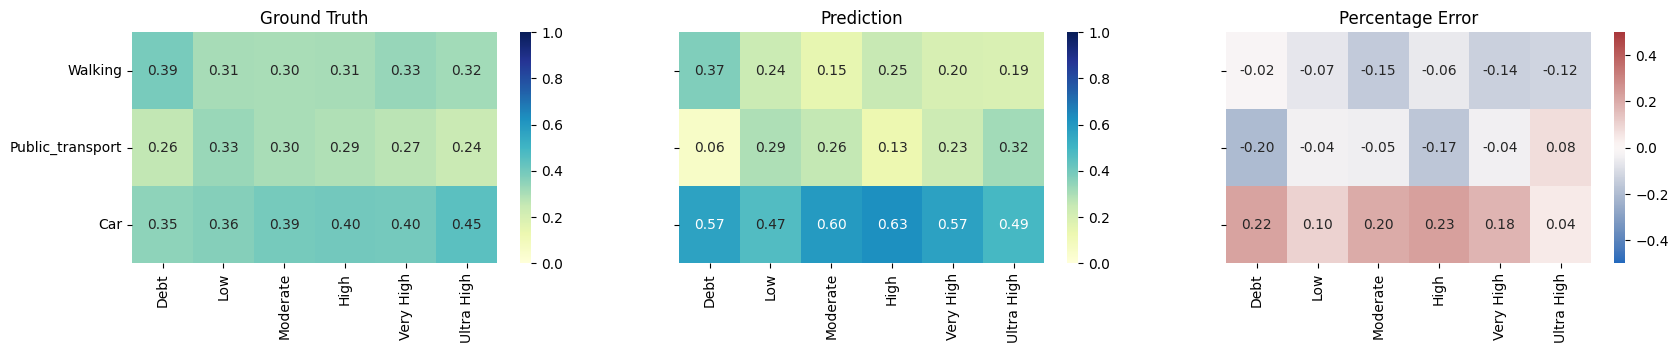

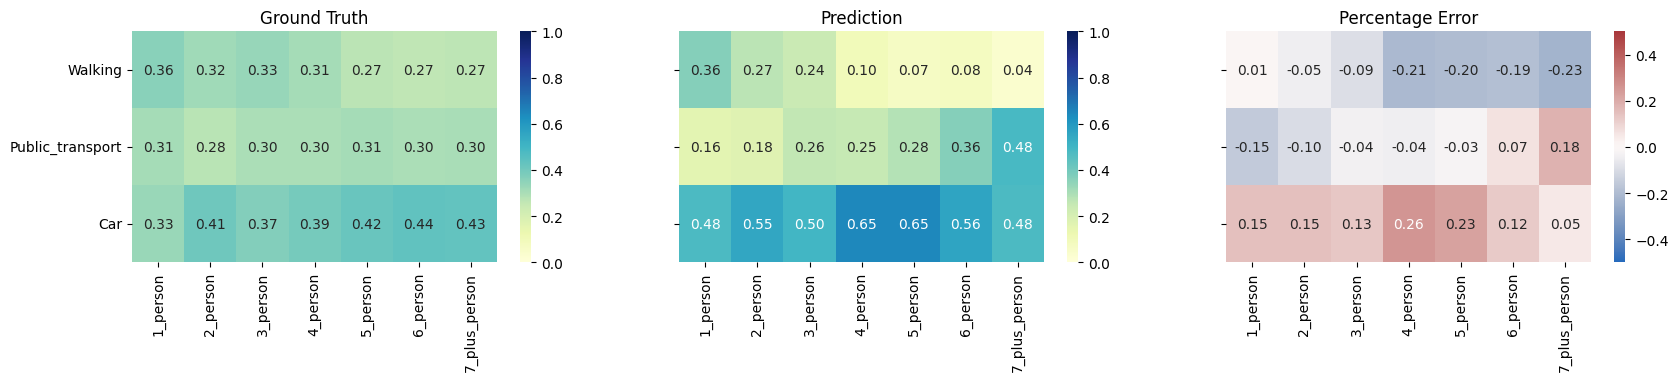

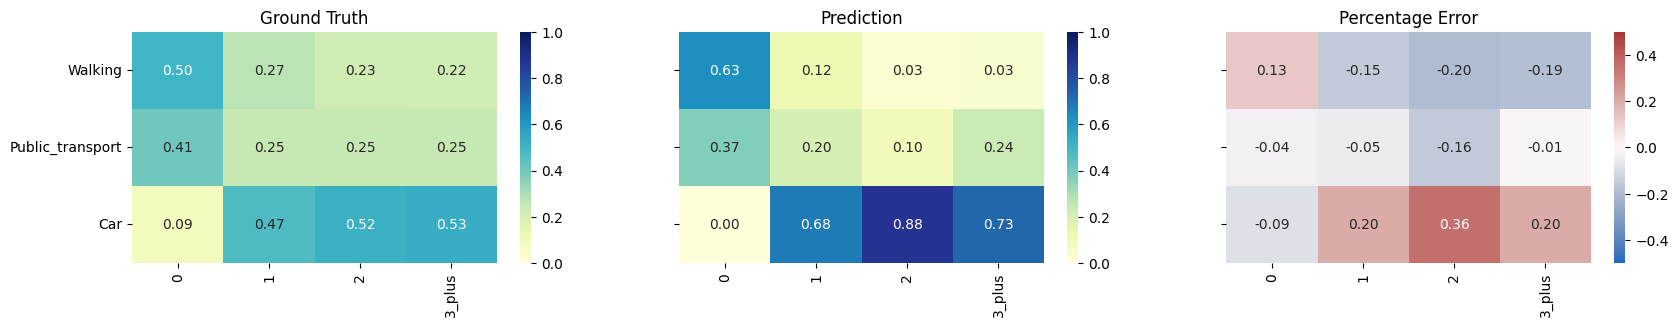

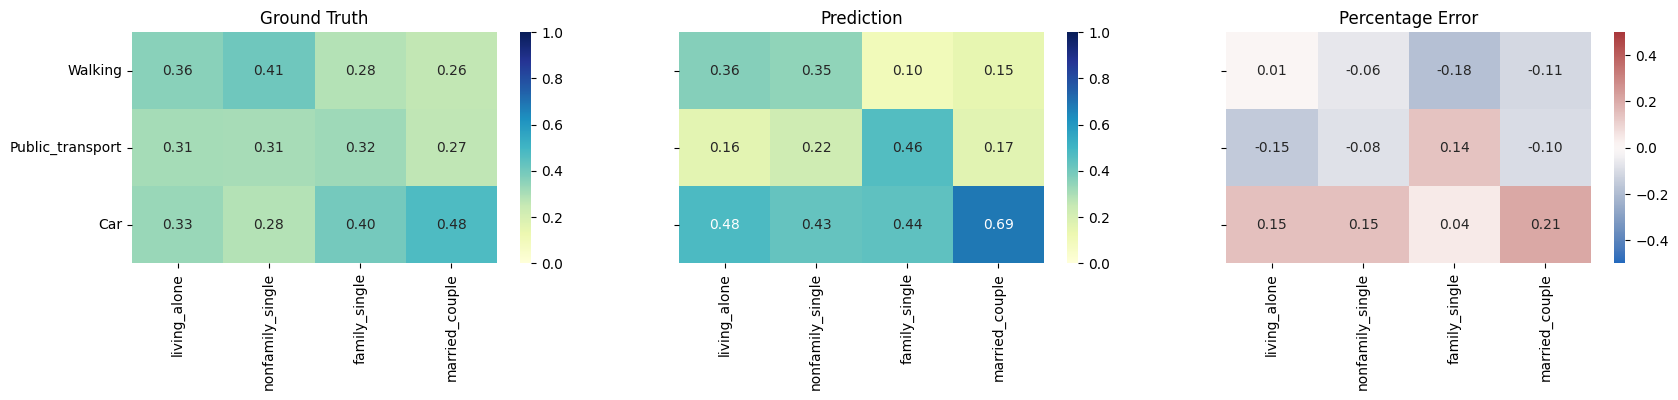

CCE LOSS: 1.0245281532624122
MAPE: 0.12328386015176478
KL Divergence: 0.2107964672666199


In [6]:
from baseline.models.random_forest import RandomForest

num_sample = 1000

model = RandomForest(data_dir='baseline/data',
                     desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
model.optimize()
model.train()
loss, error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=False)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# XGBoost


In [5]:
from baseline.models.xgboost import XGBoost


model_name = 'xgboost'

xgb_df = run_baseline_mode(model_name, XGBoost)
xgb_df.head()

100%|██████████| 10/10 [00:30<00:00,  3.05s/it]


,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,xgboost,Eat,100,1.087902,0.139010,0.079414,0.133800,0.164424,0.074579,0.118245,0.403555,0.064494,0.279226,0.873329,0.046427,0.333406,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
1,xgboost,Eat,200,1.086823,0.138699,0.113988,0.142553,0.163459,0.133070,0.138354,0.924604,0.088672,0.180300,0.313879,0.131161,0.327723,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
2,xgboost,Eat,300,1.087624,0.144407,0.110261,0.151055,0.115676,0.136999,0.131680,0.209749,0.085528,0.199516,0.353541,0.111267,0.191920,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
3,xgboost,Eat,400,1.085743,0.107374,0.091334,0.121482,0.106768,0.158316,0.117055,0.105873,0.055748,0.156864,1.366052,0.165443,0.369996,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
4,xgboost,Eat,500,1.084696,0.106134,0.115003,0.127664,0.123487,0.105475,0.115553,0.094358,0.097502,0.203983,2.189773,0.117518,0.540627,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."


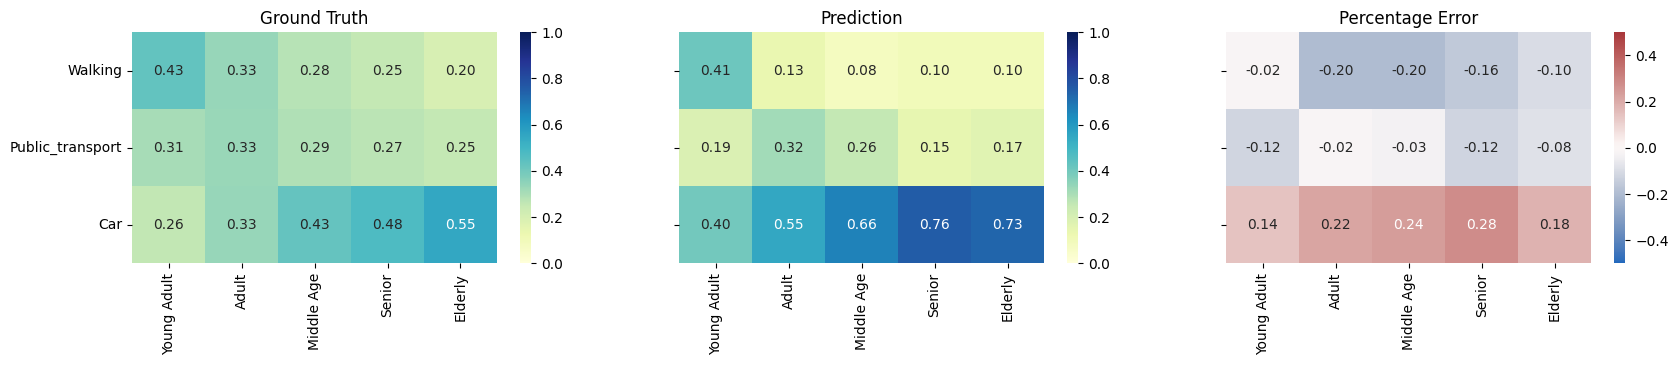

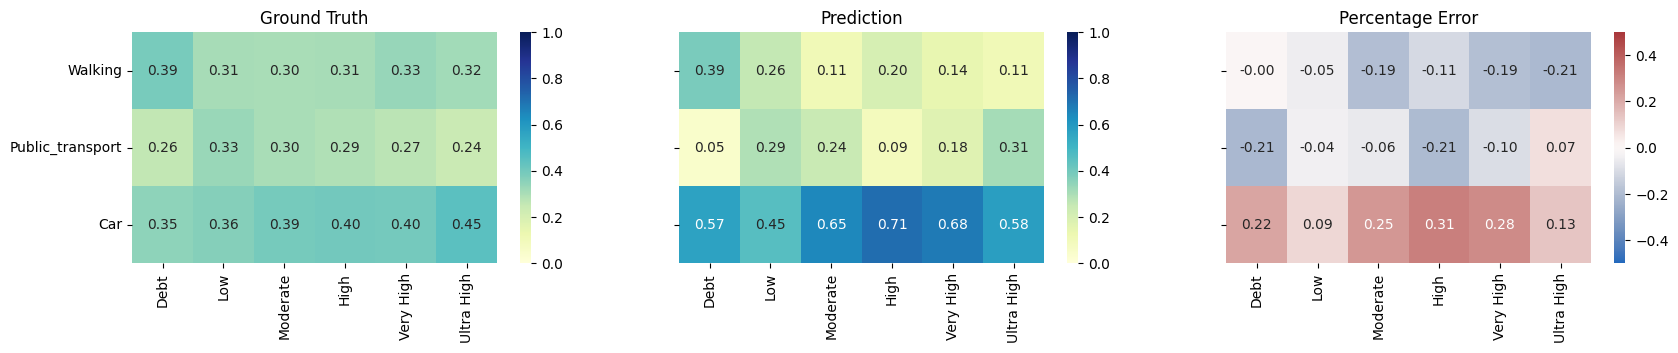

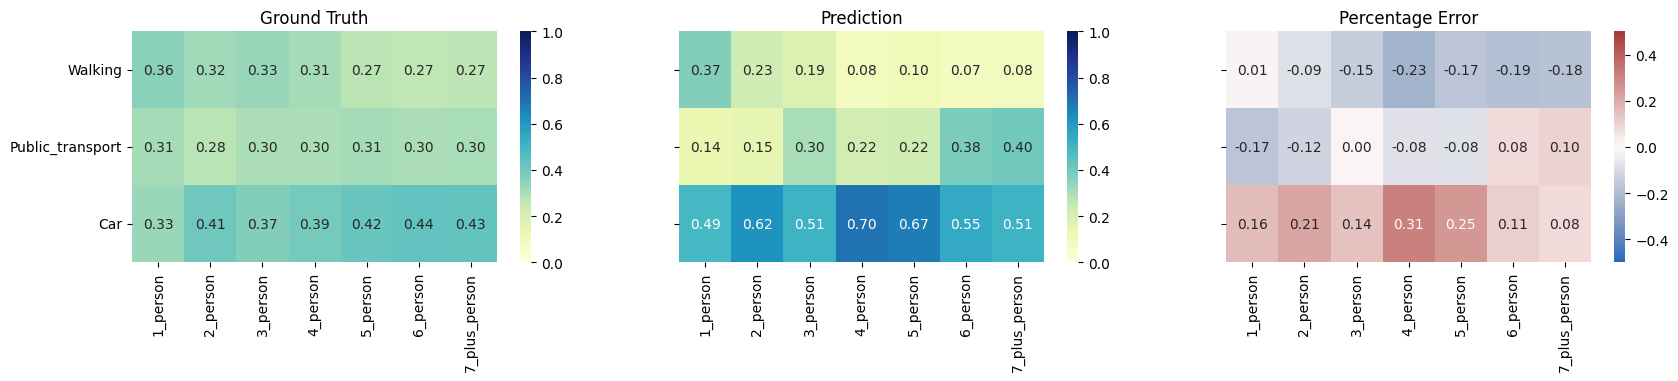

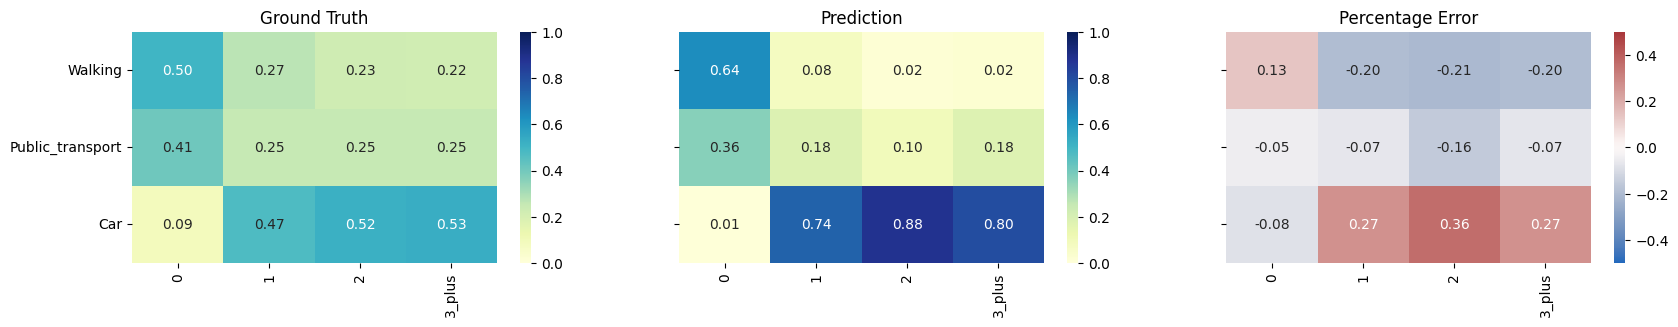

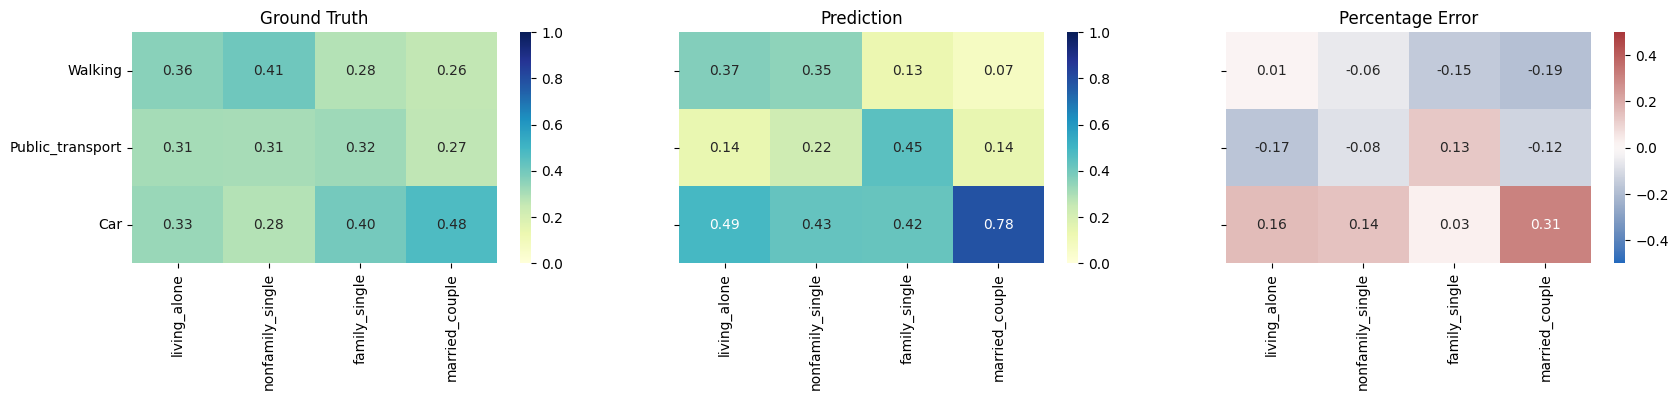

CCE LOSS: 1.084820076438607
MAPE: 0.14657221464394707
KL Divergence: 0.18205245181266955


In [6]:
from baseline.models.xgboost import XGBoost

num_sample = 1000

model = XGBoost(data_dir='baseline/data',
                desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
model.optimize()
model.train()
loss, error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# Multilayer Perceptron


In [7]:
from baseline.models.multilayer_perceptron import MLP

model_name = 'multilayer_perceptron'

mlp_df = run_baseline_mode(model_name, MLP)
mlp_df.head()

  0%|          | 0/10 [00:00<?, ?it/s]/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimi

,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,multilayer_perceptron,Eat,100,1.076327,0.122846,0.087749,0.205449,0.117372,0.081635,0.123010,0.198967,0.052049,0.393038,1.205258,0.058998,0.381662,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
1,multilayer_perceptron,Eat,200,1.039511,0.181063,0.086198,0.189733,0.154065,0.139899,0.150192,0.989695,0.053696,1.043668,2.267712,0.119540,0.894862,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
2,multilayer_perceptron,Eat,300,1.040935,0.149698,0.069497,0.219081,0.145450,0.124685,0.141682,0.168116,0.027338,1.780151,2.217164,0.149704,0.868494,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
3,multilayer_perceptron,Eat,400,1.040071,0.141961,0.074122,0.149018,0.165972,0.119394,0.130093,0.140769,0.042823,0.223162,2.242181,0.097484,0.549284,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
4,multilayer_perceptron,Eat,500,1.027327,0.161109,0.121099,0.169217,0.186718,0.112966,0.150222,0.195306,0.116061,0.389390,2.301739,0.132244,0.626948,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."


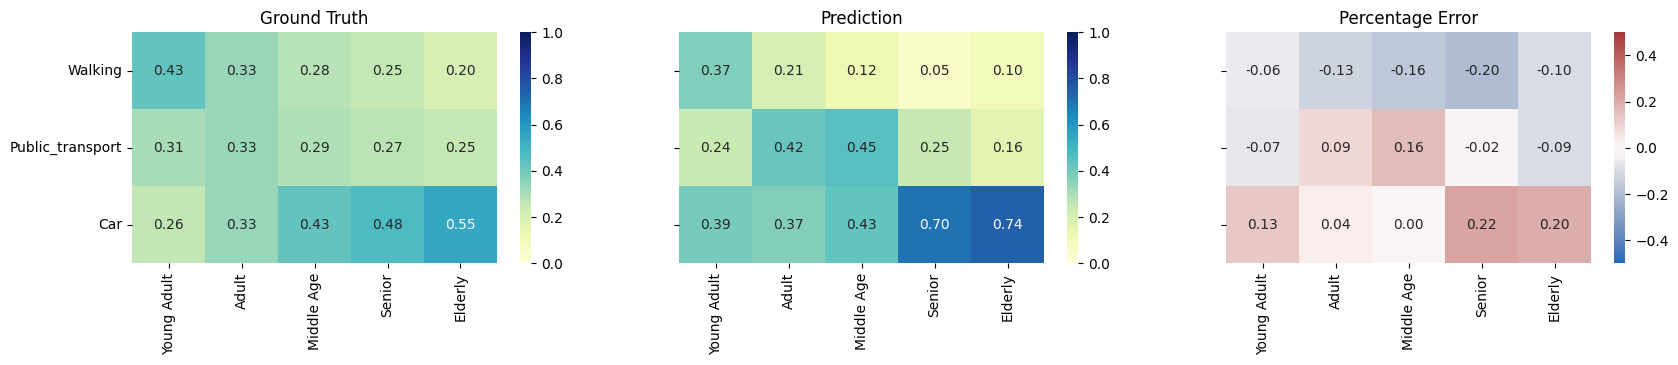

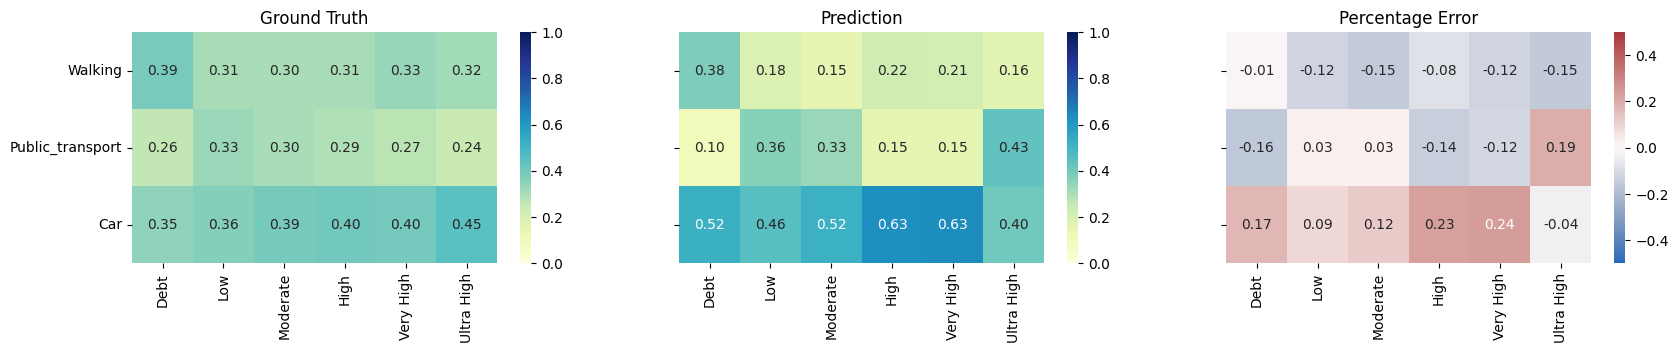

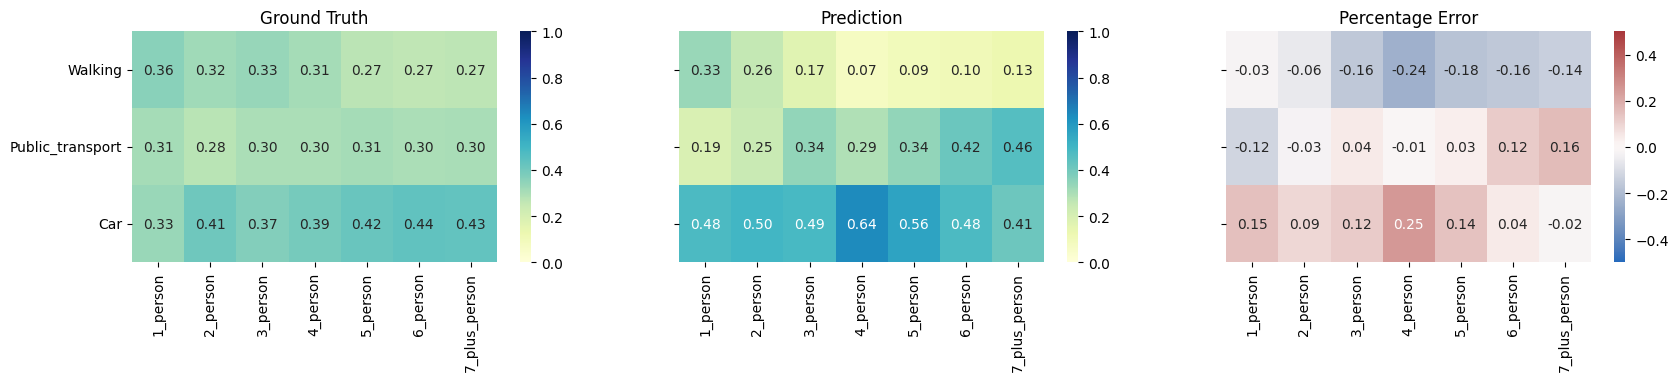

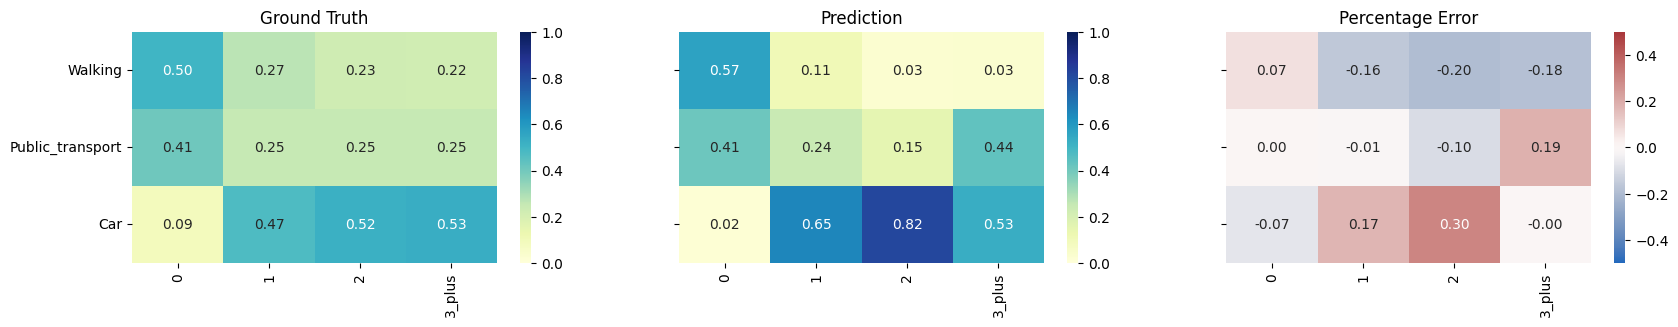

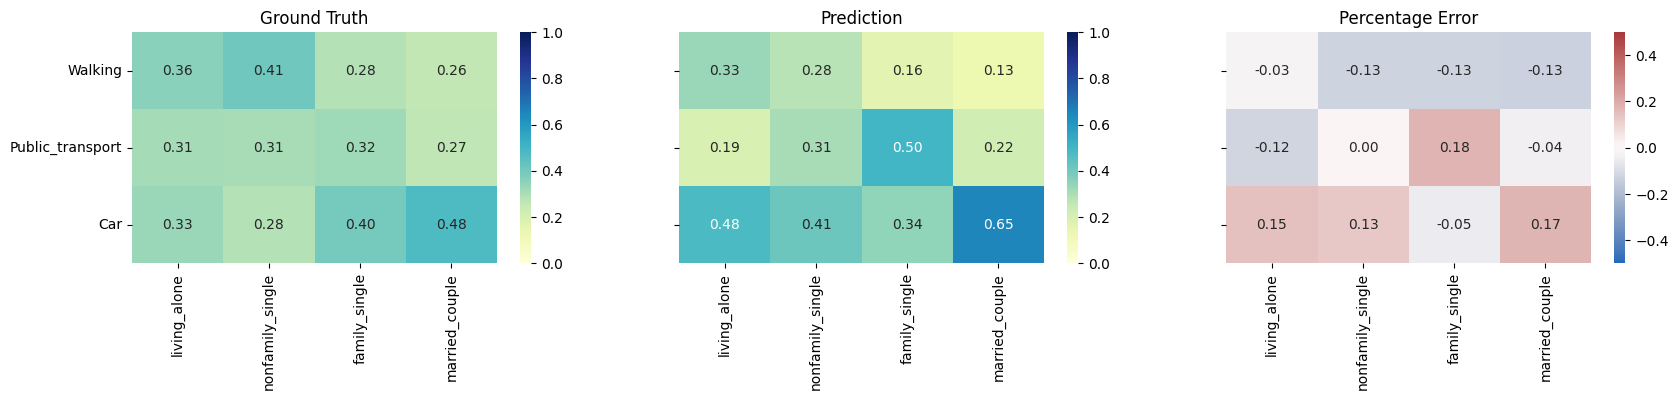

CCE LOSS: 1.0530941446773612
MAPE: 0.11368153875559006
KL Divergence: 0.11622791416830527


In [8]:
from baseline.models.multilayer_perceptron import MLP

num_sample = 1000

model = MLP(data_dir='baseline/data',
            desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
# model.optimize()
model.train()
loss, error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# LLM


In [9]:
from model import ChoiceModel

model_name = 'proposed_method'

proposed_df = run_proposed_model(model_name, ChoiceModel)
proposed_df.head()

,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,proposed_method,Eat,100,1.223990,0.186116,0.070887,0.069825,0.053247,0.064181,0.088851,3.591239,0.037869,0.039725,0.021603,0.023491,0.742785,NaN
1,proposed_method,Eat,200,1.159135,0.171880,0.070643,0.081877,0.073262,0.070270,0.093586,3.566189,0.036269,0.051860,0.031462,0.052303,0.747617,NaN
2,proposed_method,Eat,300,1.173812,0.070843,0.085646,0.089144,0.074105,0.078034,0.079554,0.039925,0.041670,0.057374,0.030510,0.036721,0.041240,NaN
3,proposed_method,Eat,400,1.456413,0.098252,0.070469,0.095933,0.062016,0.064331,0.078200,0.077156,0.037542,0.084558,0.028299,0.024823,0.050476,NaN
4,proposed_method,Eat,500,1.353804,0.115097,0.083491,0.072317,0.090168,0.072960,0.086807,1.877769,0.043724,0.030816,0.051845,0.030788,0.406988,NaN


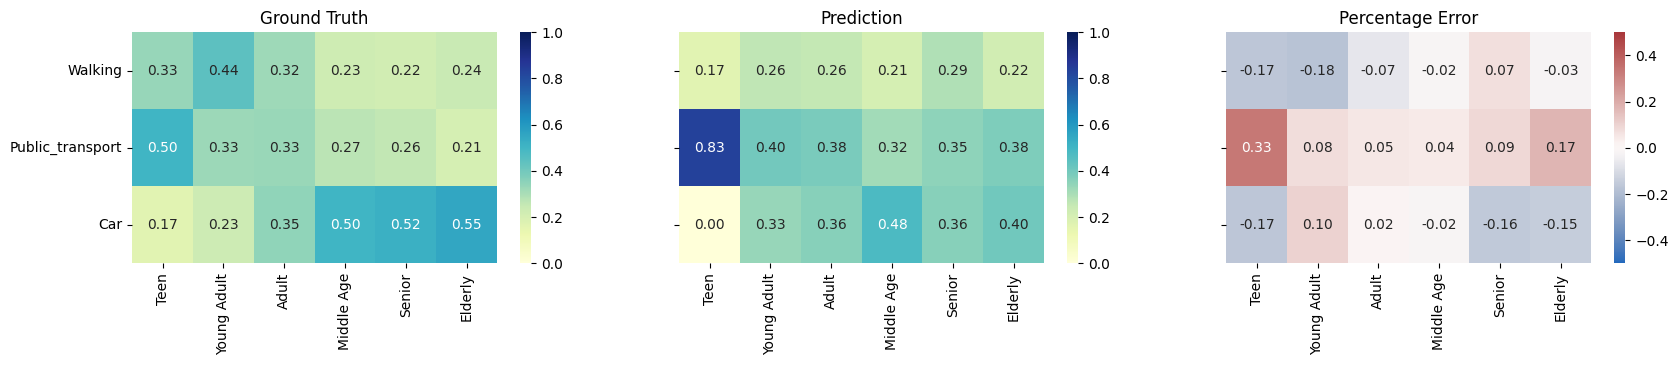

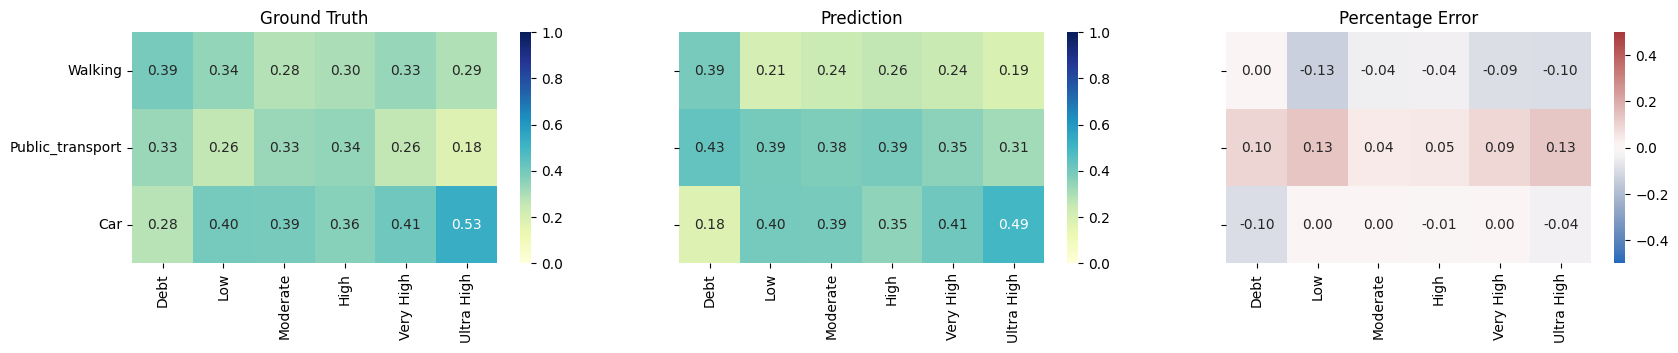

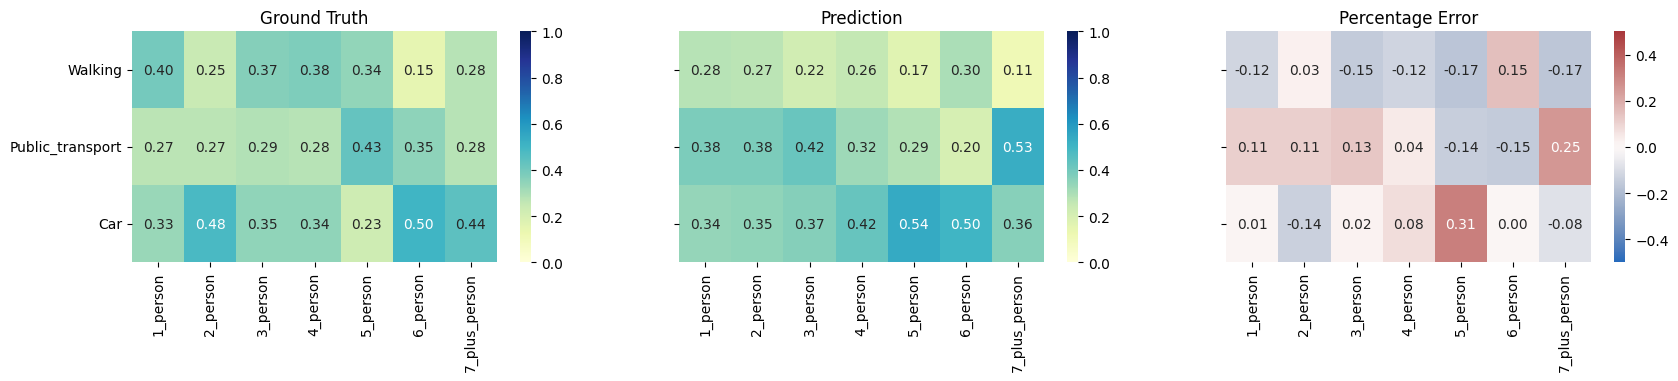

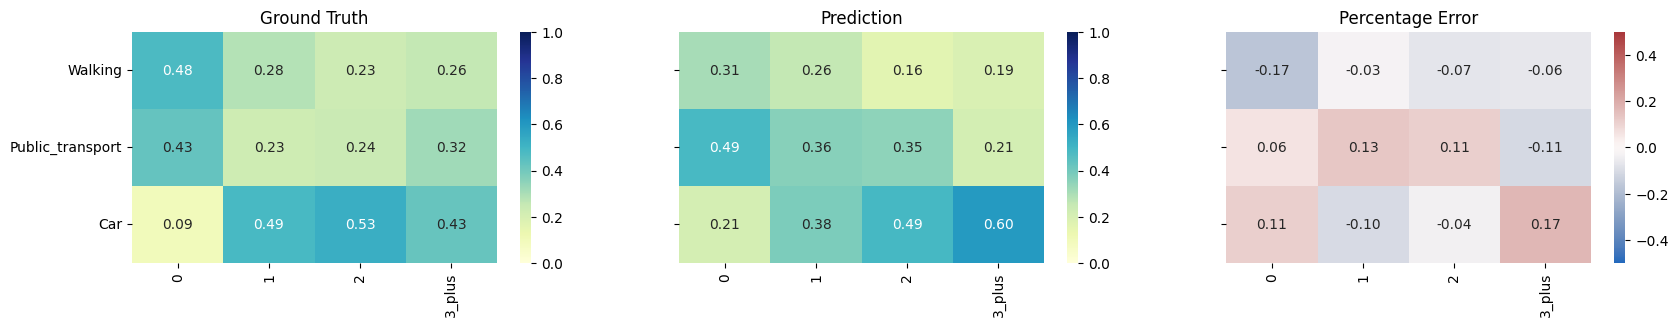

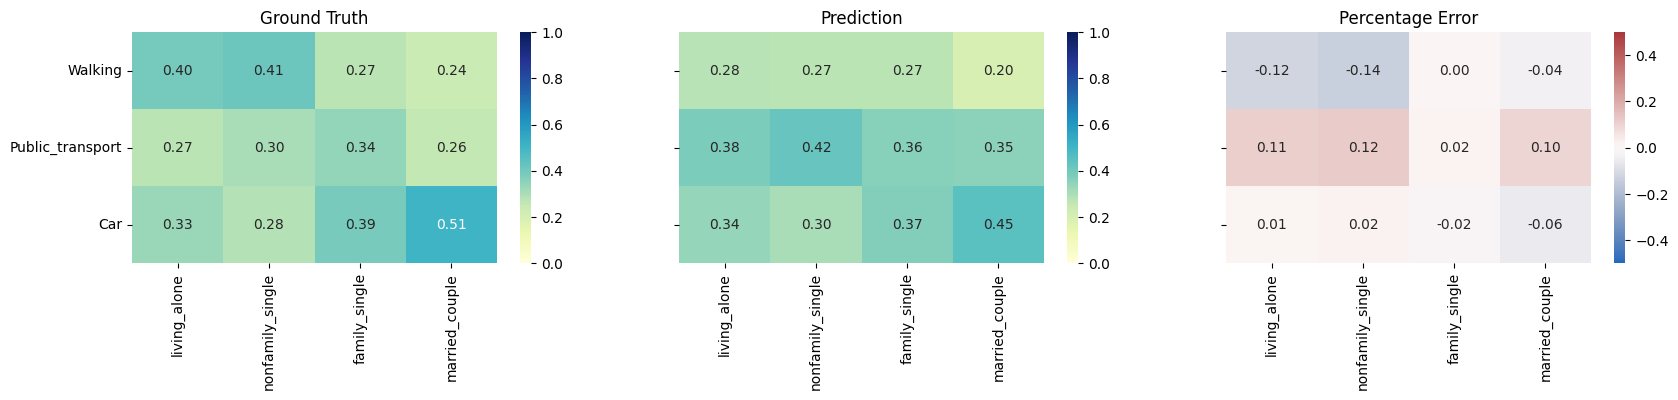

CCE LOSS: 1.2066413263725602
MAPE: 0.08898385247596938
KL Divergence: 0.15642294249934408


In [10]:
from model import ChoiceModel

model_name = 'proposed_method'
num_sample = 0

choice_model = ChoiceModel(
    data_dir='data', desire=desire, sample_num=num_sample, skip_init=True, seed=seed)

loss, error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

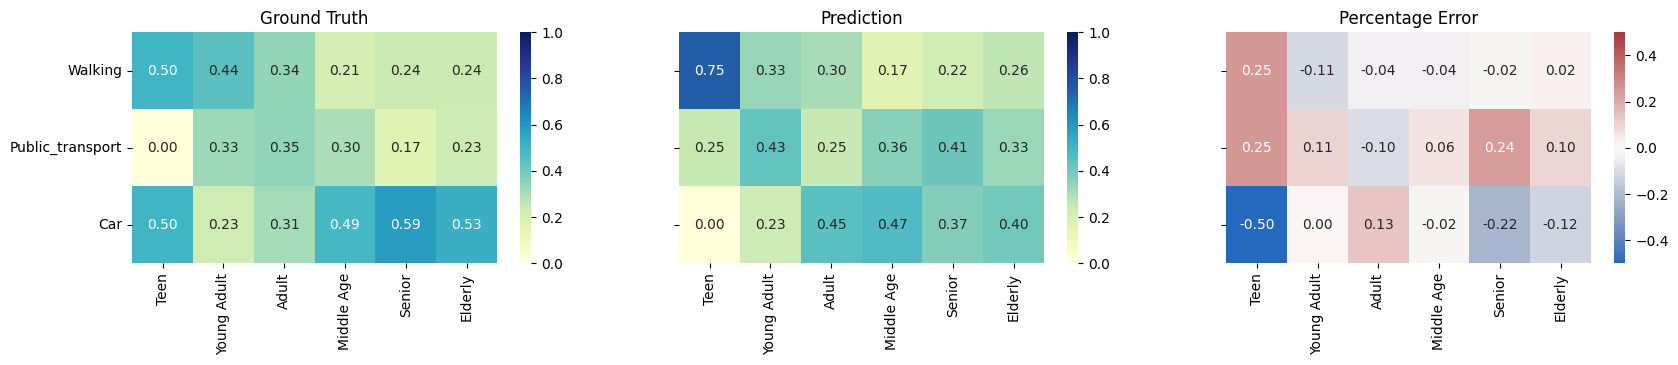

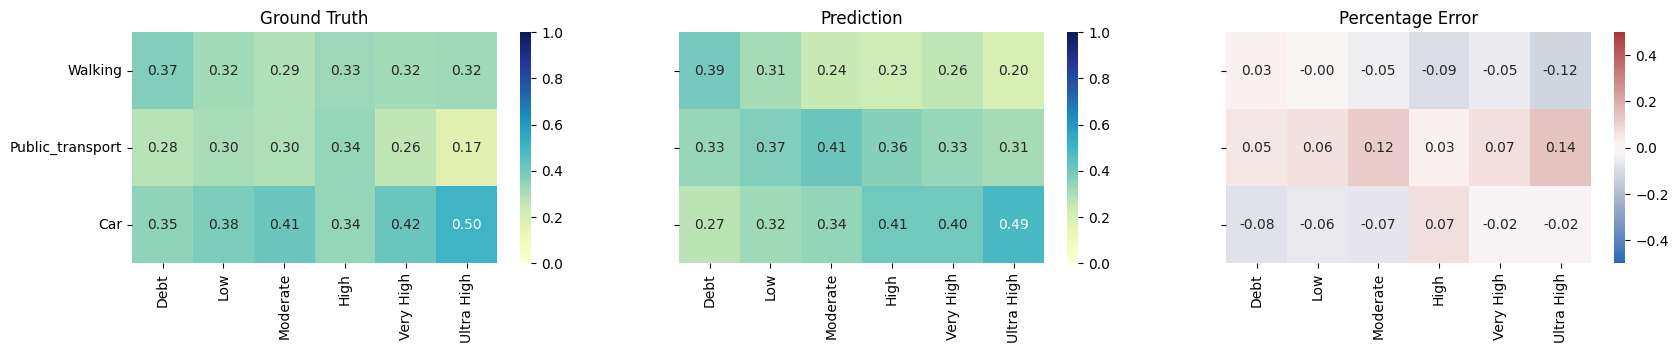

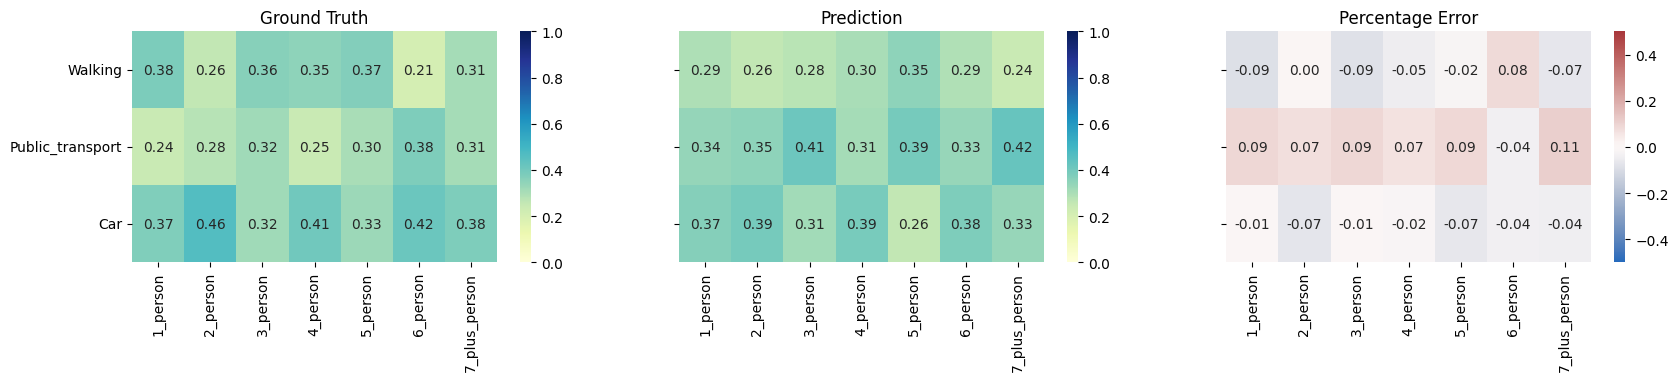

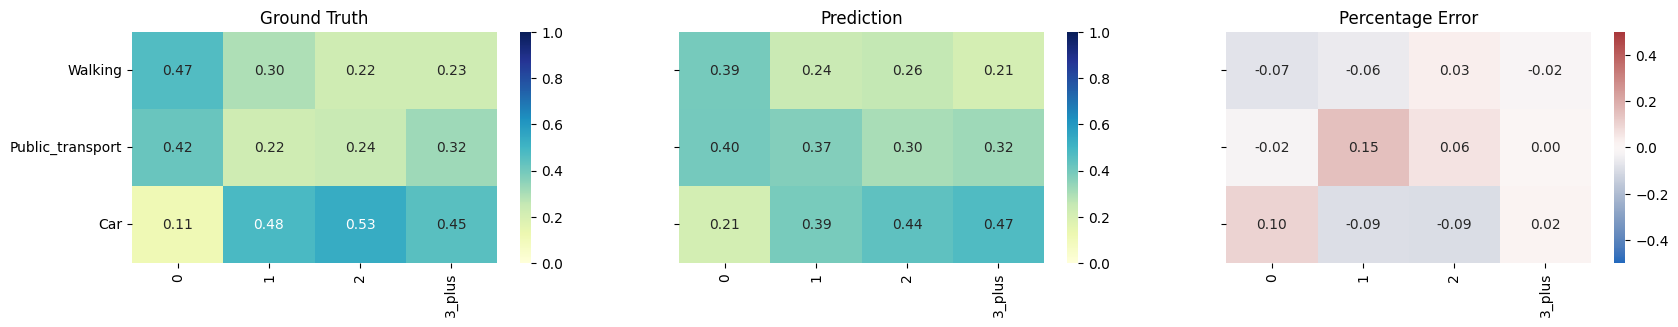

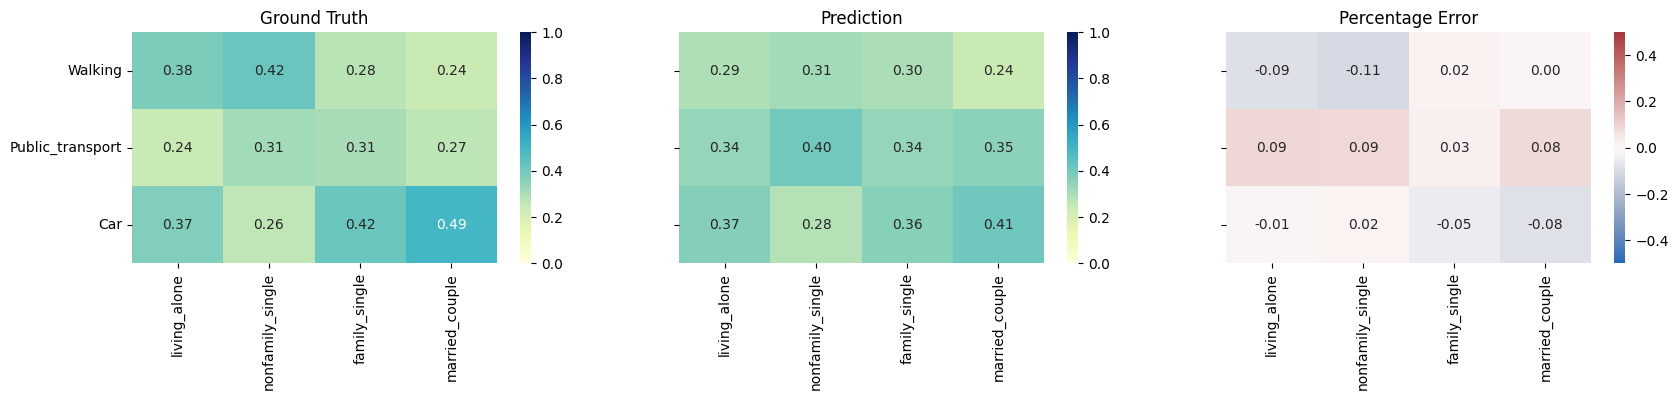

CCE LOSS: 1.3686741980356574
MAPE: 0.07326238000703185
KL Divergence: 0.36296476474502054


In [11]:
from model import ChoiceModel

model_name = 'proposed_method'
num_sample = 1000

choice_model = ChoiceModel(
    data_dir='data', desire=desire, choice_type=choice_type,
    sample_num=num_sample, skip_init=True, seed=seed)

loss, error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

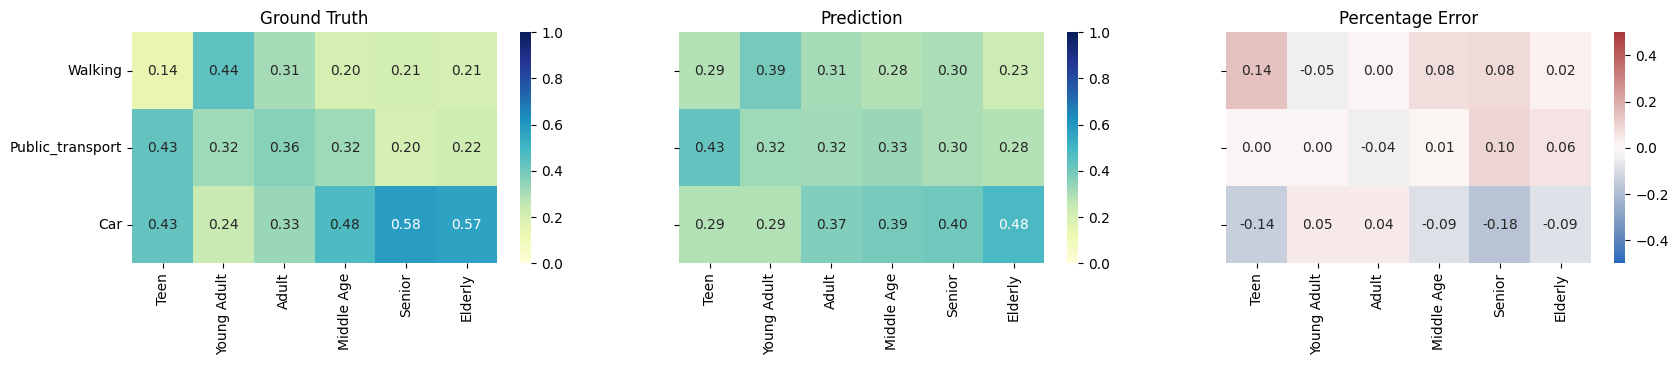

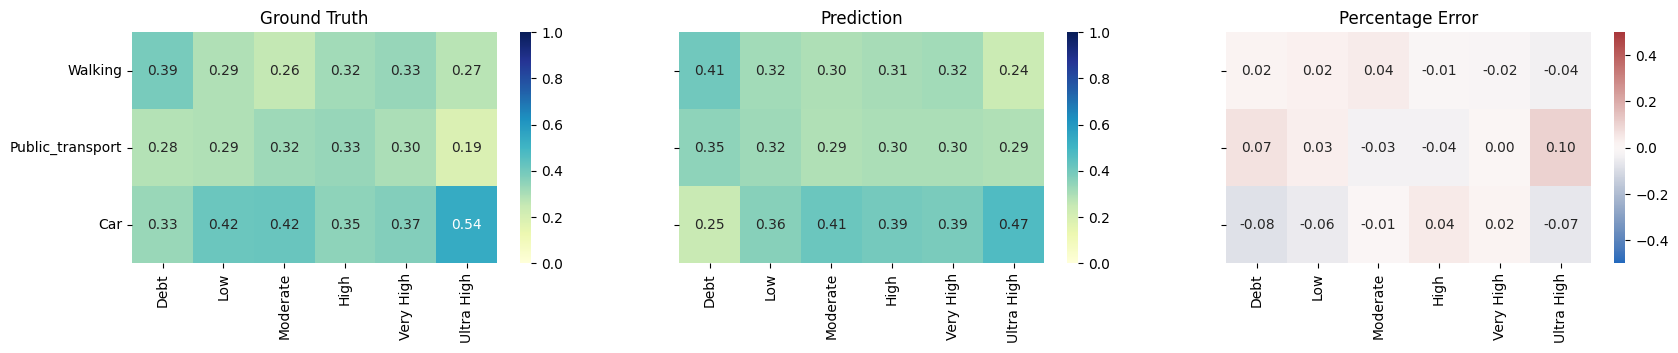

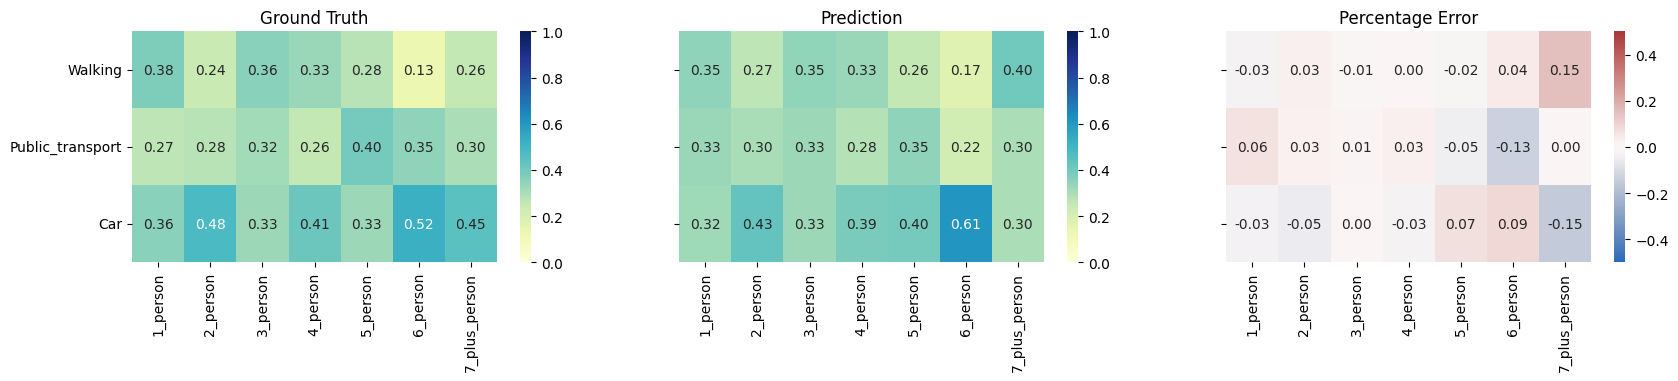

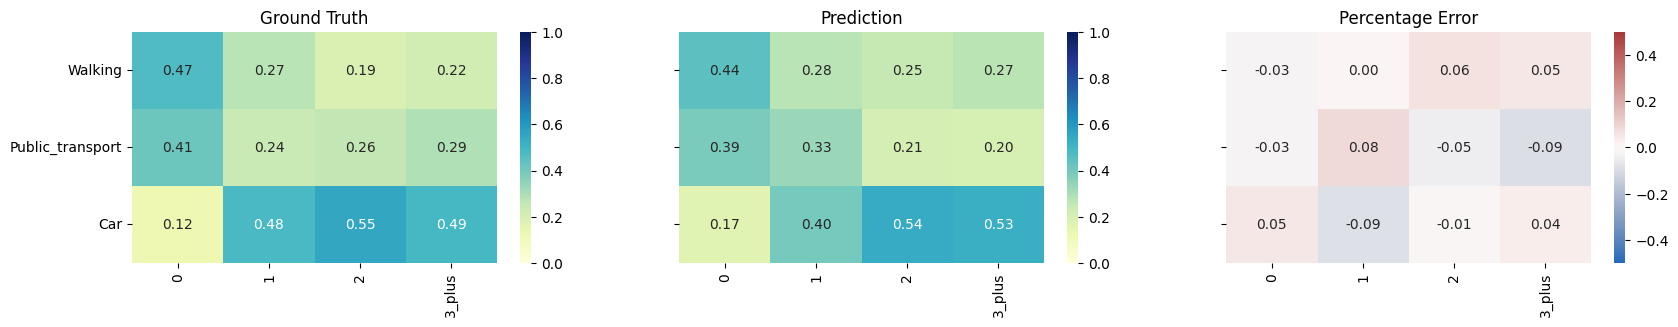

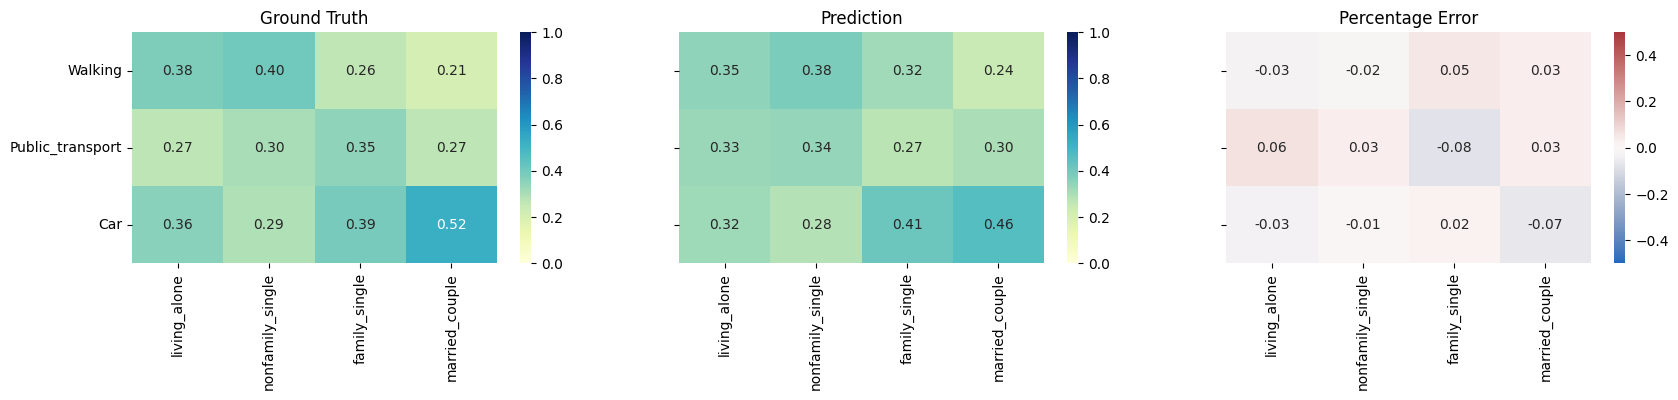

CCE LOSS: 1.0884173603051874
MAPE: 0.04797085309695294
KL Divergence: 0.017768929061586707


In [21]:
from model import ChoiceModel

model_name = 'proposed_method'
num_sample = 10000

choice_model = ChoiceModel(
    data_dir='data', desire=desire, choice_type=choice_type,
    sample_num=num_sample, skip_init=True, seed=seed)

loss, error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# Results


In [18]:
expeiment_data = pd.concat(
    [rf_df, xgb_df, mlp_df, proposed_df], ignore_index=True)
expeiment_data.head()
experiment_path = 'data/experiments/experiments_mode(<1000).csv'
expeiment_data.to_csv(experiment_path, index=False)

In [15]:
# experiment_path = 'data/experiments/experiments_01.csv'
# expeiment_data = pd.read_csv(experiment_path)

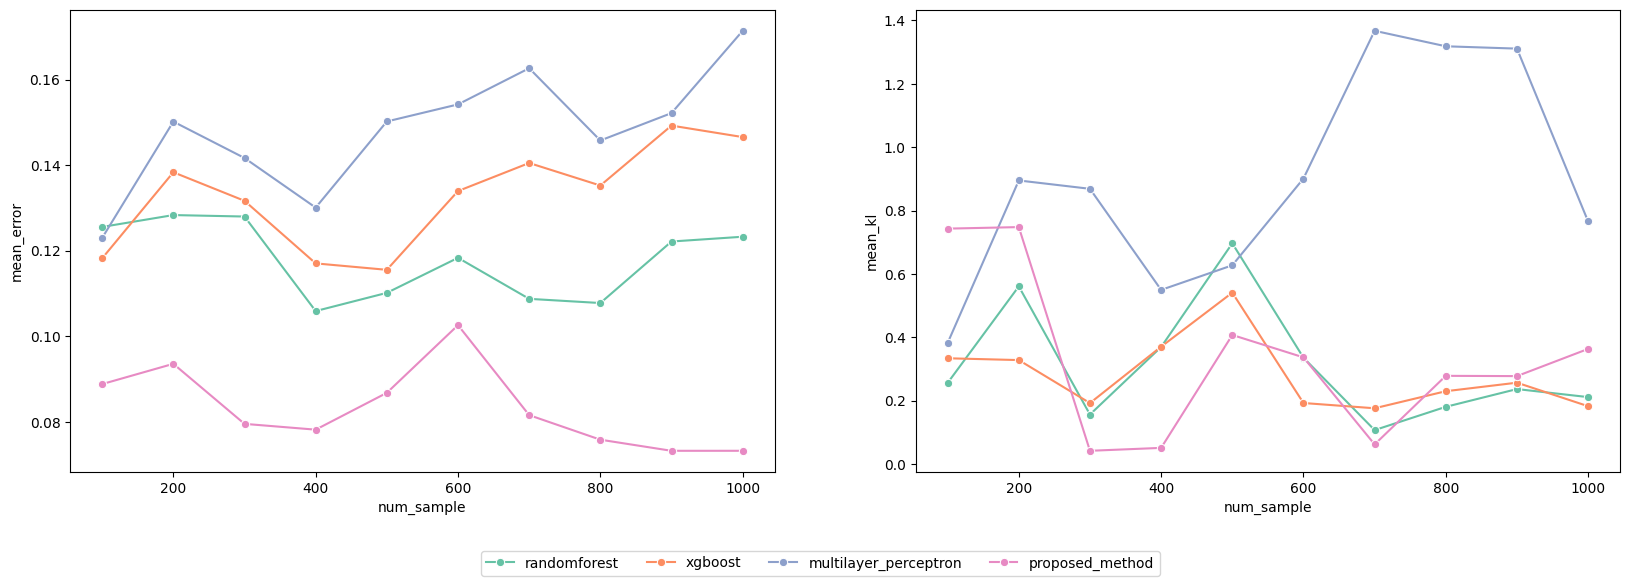

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

plot_data = expeiment_data

color_palette = "Set2"

# line1 = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
#                      y='loss', ax=axs[0], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])

line1 = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                     y='mean_error', ax=axs[0], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])

line2 = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                     y='mean_kl', ax=axs[1], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])


handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
for ax in axs:
    # ax.set_xticks(range(0, 22000, 4000))
    ax.legend().remove()

# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.show()

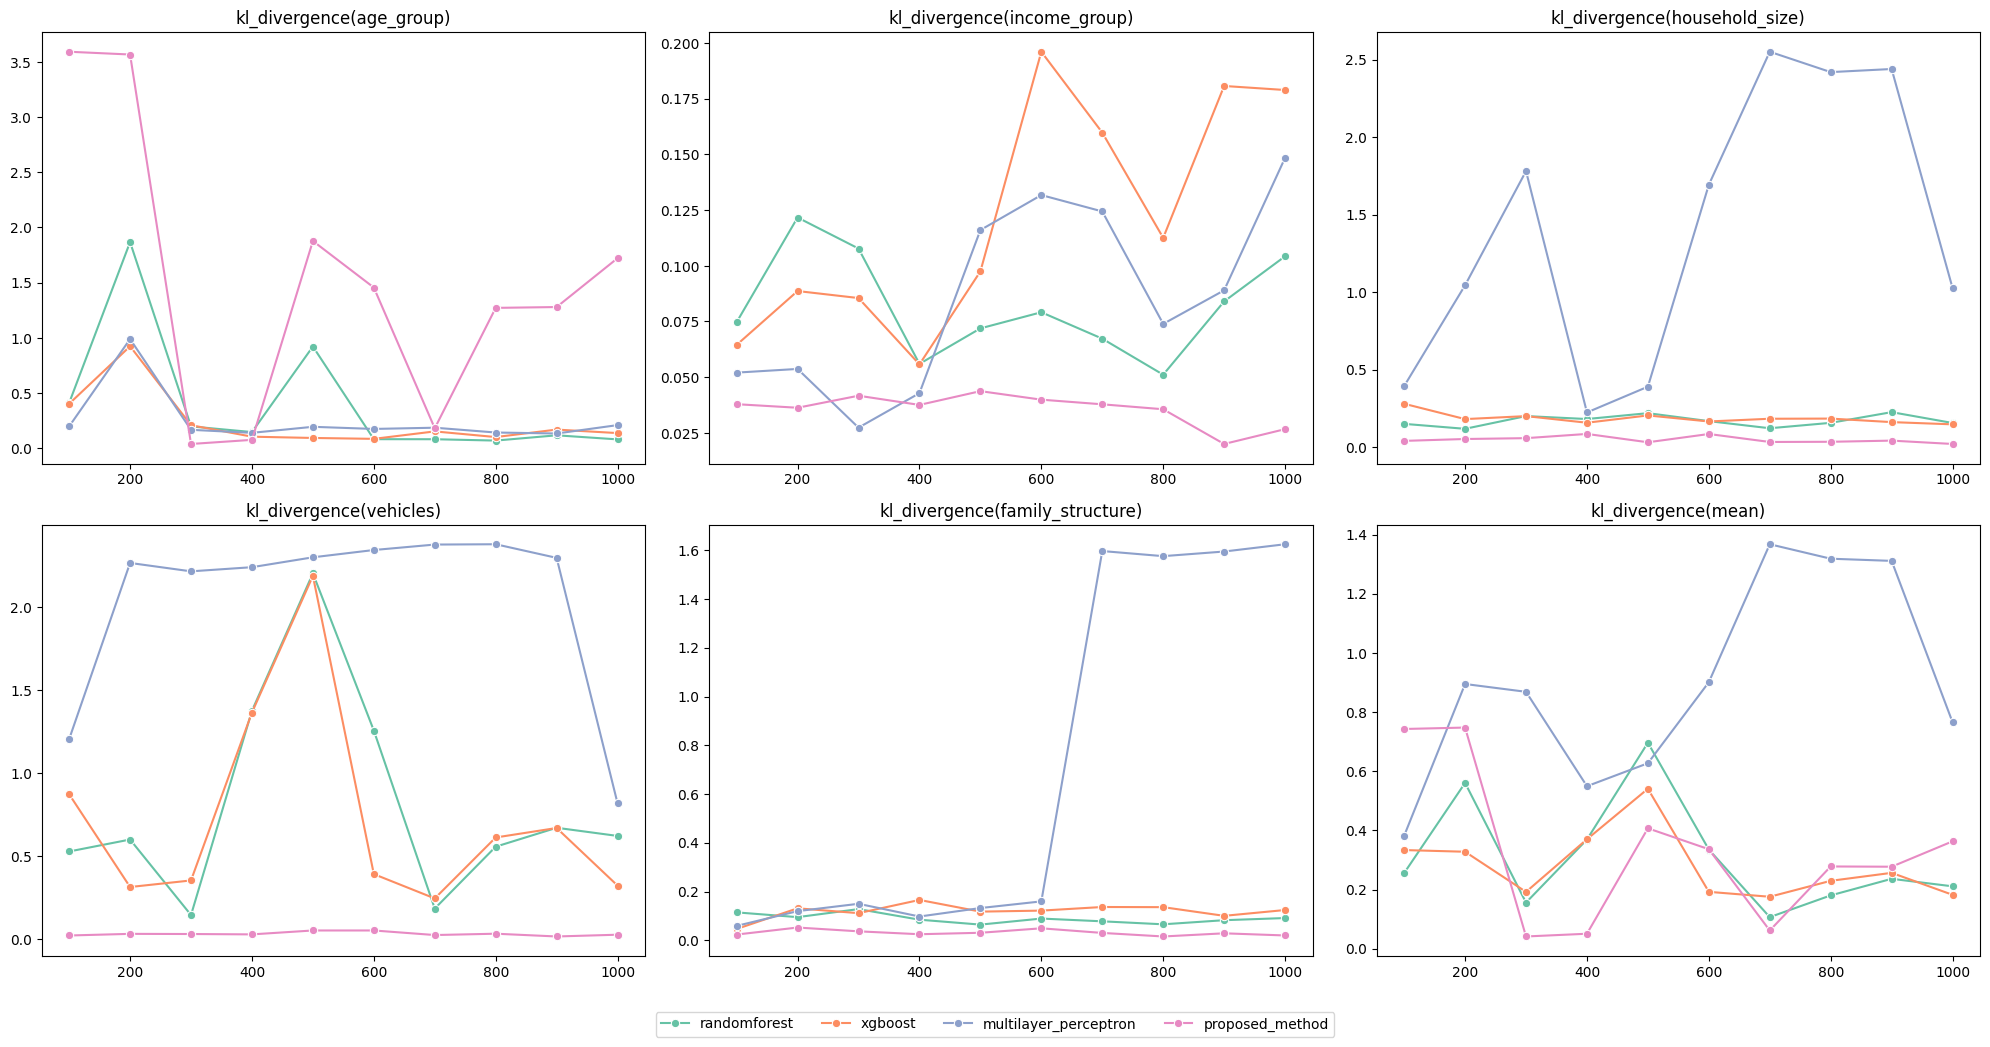

In [20]:
plot_data = expeiment_data

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs = axs.flatten()

for idx, key in enumerate(['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']):
    col_name = key + '_kl'
    line = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                        y=col_name, ax=axs[idx], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])
    axs[idx].set_title(f'kl_divergence({key})')
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    # axs[idx].set_xticks(range(0, 22000, 4000))
    axs[idx].legend().remove()


handles, labels = line.get_legend_handles_labels()

# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.tight_layout()
plt.show()

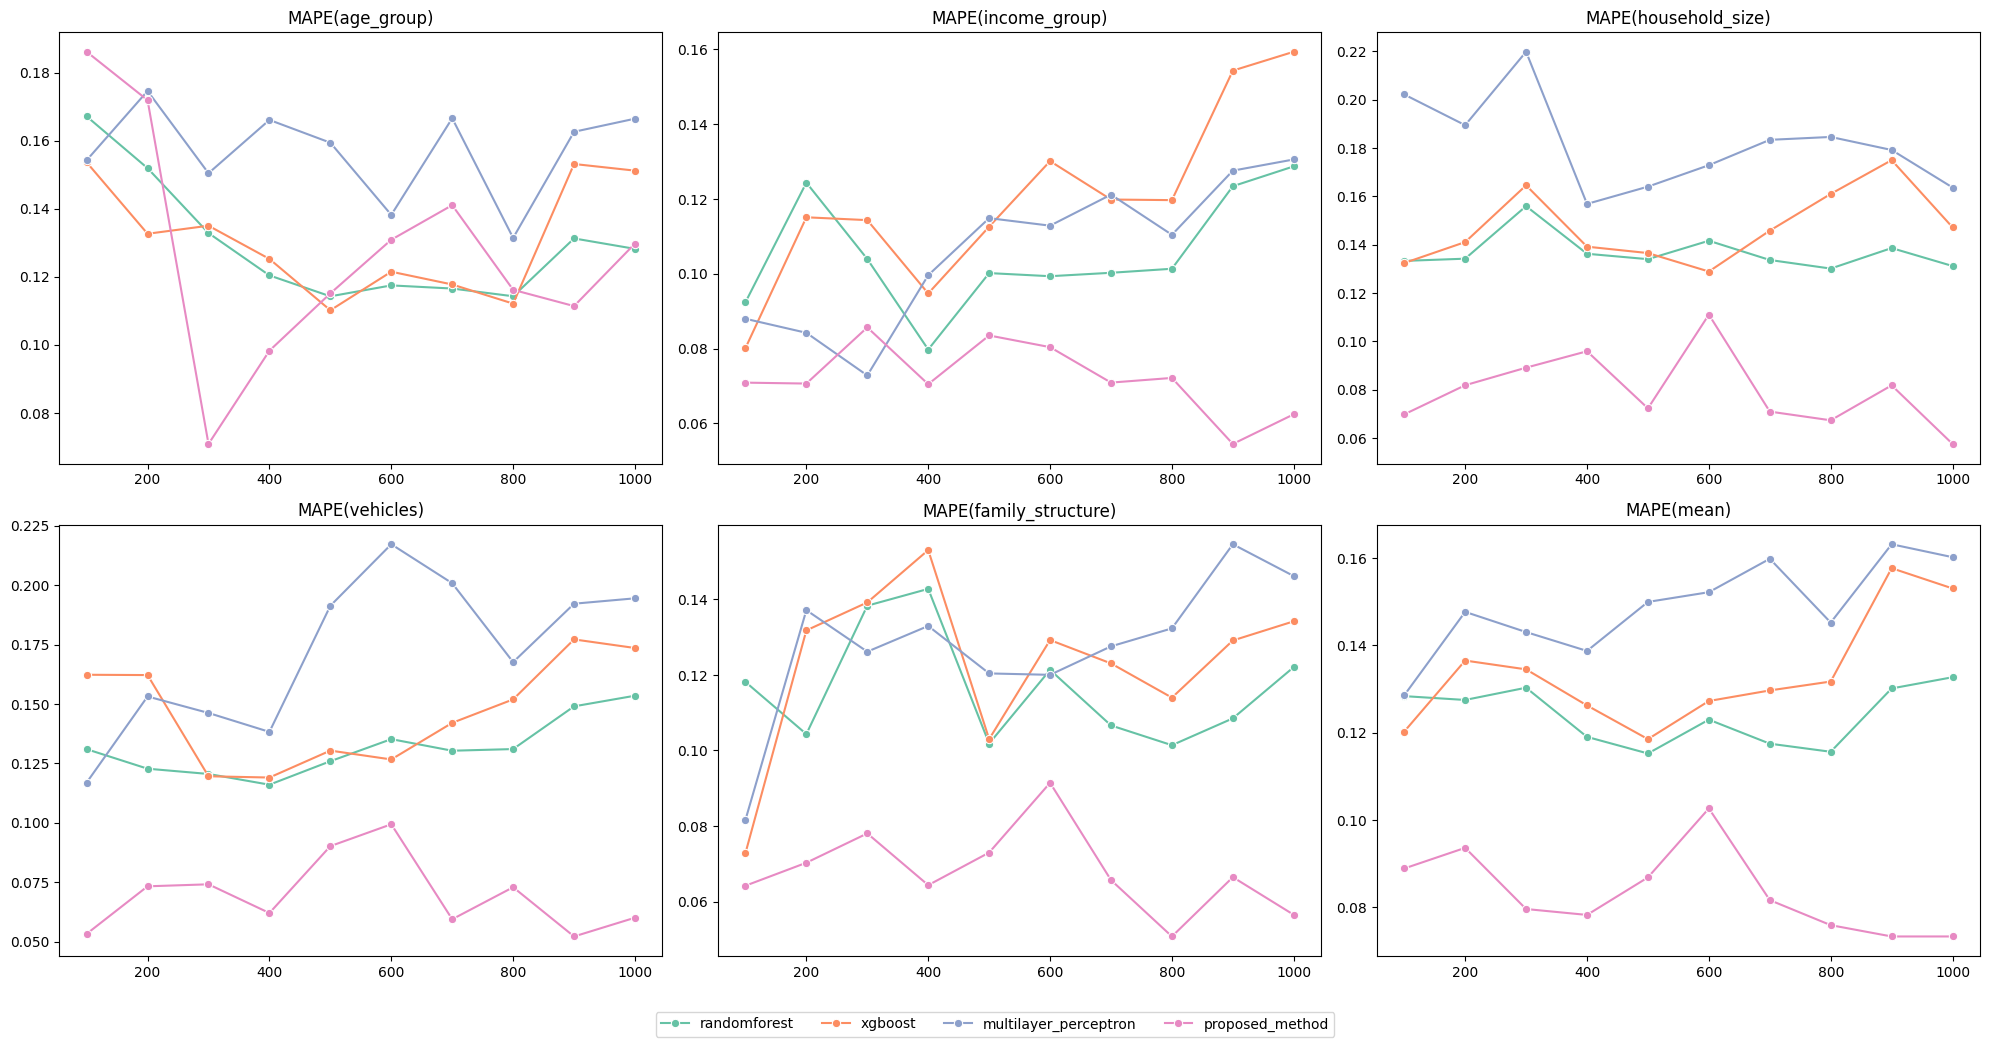

In [18]:
plot_data = expeiment_data

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs = axs.flatten()

for idx, key in enumerate(['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']):
    col_name = key + '_error'
    line = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                        y=col_name, ax=axs[idx], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])
    axs[idx].set_title(f'MAPE({key})')
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    # axs[idx].set_xticks(range(0, 22000, 4000))
    axs[idx].legend().remove()


handles, labels = line.get_legend_handles_labels()

# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.tight_layout()
plt.show()